In [92]:
# description: simply compare three common image libraries: OpenCV & PIL & Skimage
# data: prepare a test.png under the current folder
# author: wiki-yu
# date: 04/29/2021

In [93]:
# 1.PIL
# PIL: it is a open-source library for Python that adds support for opening, manipulating, and saving many different image file formats. 
# pillow: Development of the original project, known as PIL, was discontinued in 2011. 
# Subsequently, a successor project named Pillow forked the PIL repository and added Python 3.x support
# PIL is available for Windows, Mac OS X and Linux. The latest version of PIL is 1.1.7, was released in September 2009 and supports Python 1.5.2–2.7

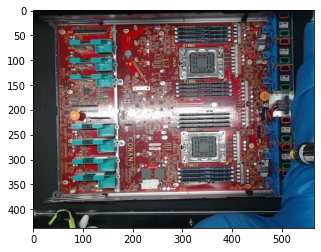

<class 'PIL.PngImagePlugin.PngImageFile'>
(566, 438)
RGBA
PNG
(6, 9, 8, 255)


In [94]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# opencv & skimage use "imread" method, but PIL use "open" method
# the image read is a class: 'PIL.PngImagePlugin.PngImageFile', it brings properties and methods
# need matplotlib to display the image

img = Image.open("test.png")
plt.imshow(img)
plt.show()

# # convert the PIL image object to an array
# arr_img = np.array(img)

print(type(img)) # PIL image class
print(img.size) # PIL image class property
print(img.mode) # PIL image class property
print(img.format) # PIL image class property
print(img.getpixel((0, 0))) # PIL image class method

# PIL image class methods

# crop method
# args:(x1, y1, x2, y2)
crop_box = (20, 20, 400, 200)
img_crop = img.crop(crop_box)
# plt.imshow(img_crop)
# plt.show()

# resize method
# args: (width, height)
img_resized = img.resize((400, 400))
# plt.imshow(img_resized)
# plt.show()

# rotate method
# args: (angle)
img_rotated = img.rotate((45))
# plt.imshow(img_rotated)
# plt.show()

# transpose left and right
img_transposed = img.transpose(Image.FLIP_LEFT_RIGHT) 
# transpose up and down
img_transposed = img.transpose(Image.FLIP_TOP_BOTTOM)
# plt.imshow(img_rotated)
# plt.show()

In [95]:
# 2.skimage
# scikit-image is an open-source image processing library for the Python programming language
# scikit-image is largely written in Python, with some core algorithms written in Cython to achieve performance

<class 'numpy.ndarray'>
uint8
(438, 566, 4)
<class 'numpy.ndarray'>
float64
(438, 566)
[[0.03251137 0.03448353 0.03448353 ... 0.03706588 0.18049725 0.44688118]
 [0.03251137 0.03448353 0.03448353 ... 0.03678314 0.16060667 0.41522588]
 [0.03251137 0.03448353 0.03448353 ... 0.03678314 0.16452824 0.4194302 ]
 ...
 [0.06110118 0.06110118 0.06193451 ... 0.33354118 0.34335647 0.36213098]
 [0.06110118 0.06110118 0.06193451 ... 0.33746275 0.33662941 0.34756078]
 [0.06110118 0.06110118 0.06193451 ... 0.32961961 0.33270784 0.33860157]]


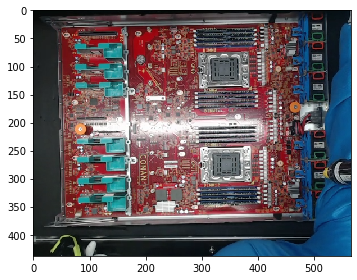

In [96]:
from skimage import io, transform
import numpy

# read the color image
img = io.imread('test.png')
io.imshow(img)

print(type(img)) # numpy.nadrray object
print(img.dtype) # unit8
print(img.shape) # (height, width, channel)
# print(img) # RGB

# read the gray image
img = io.imread('test.png', as_gray=True)

print(type(img)) # numpy.nadrray object
print(img.dtype) # float64
print(img.shape) # (height, width, channel)
print(img) # check the value range compared with reading a color image


# save the image
# io.imsave('test_save.jpg', img)

# image manipulation
img_resized = transform.resize(img, (500,500))
img_rotated1 = transform.rotate(img, 60) # rotate the image 60 degrees, size the same
img_rotated2 = transform.rotate(img, 60, resize=True) # rotate the image 60 degrees, size changed
# io.imshow(img_rotated2)


In [97]:
# 3. OpenCV

In [98]:
import cv2
import numpy as np

img = cv2.imread('test.png', 1)
# cv2.IMREAD_COLOR 1: Loads a color image. Any transparency of image will be neglected. It is the default flag. 
# cv2.IMREAD_GRAYSCALE 0: Loads image in grayscale mode 
# cv2.IMREAD_UNCHANGED -1: Loads image as such including alpha channel 4 channels

print(type(img)) # out: numpy.ndarray
print(img.dtype) # out: dtype('uint8')
print(img.shape) # out: (h, w, c) the same as skimage
# print(img) # BGR different with skimage and PIL

# # save an image
# cv2.imwrite("test_saved.png", img)

# resize an image
img_resized = cv2.resize(img, (100, 200), interpolation=cv2.INTER_LINEAR)

<class 'numpy.ndarray'>
uint8
(438, 566, 3)


# Summary
## 1. read image
*   PIL: open()
*   skimage: imread()
*   opencv: imread()


## 2. image data type
*   PIL: a PIL image object 
*   skimage: numpy array (a numpy.ndarray object) 
*   opencv: numpy array (a numpy.ndarray object) 

## 3. image channel
*   PIL: RGB (PIL image can be saved as array using np.array(img))
*   skimage: RGB
*   opencv: BGR

## 4. others:
skimage reads color image and grayscale image diffrently!!!
the range of an gray image is [0 1] while [0 255] for color image


